## 0. Fashion dataset (*)
Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras.

a) Start visualizing some of the sample images

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam 
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets.fashion_mnist import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [17]:
def display_images(data, nrows=2, ncols=5, figsize=(12, 4)):
    
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap="gray") #0-9 and all rows and columns
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

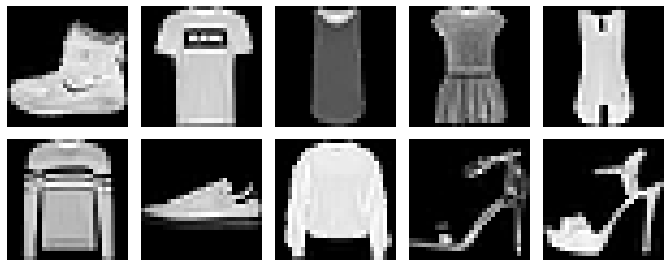

In [18]:
display_images(X_train)

b) Normalize the images to values between 0 and 1

In [19]:
X_train_norm = X_train.astype("float32")/255
X_test_norm = X_test.astype("float32")/255

In [20]:
X_train_norm.min(), X_train_norm.max(), X_test_norm.min(), X_train_norm.max()

(0.0, 1.0, 0.0, 1.0)

c) Visualize same images as before, do you see any difference?

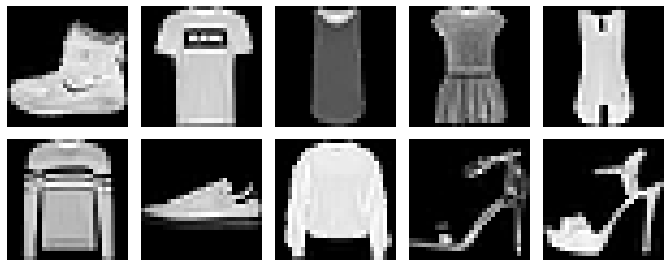

In [22]:
display_images(X_train_norm)

They look the same. 

d) Make histogram of a sample image before and after normalization. What do you notice?

<AxesSubplot:ylabel='Count'>

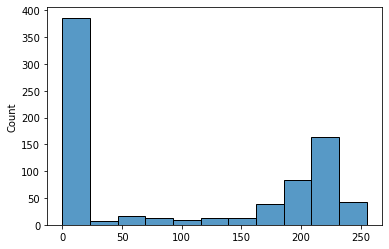

In [29]:
sns.histplot(X_train[0,:,:].flatten())

<AxesSubplot:ylabel='Count'>

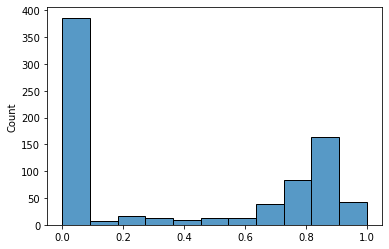

In [28]:
sns.histplot(X_train_norm[0,:,:].flatten())

They are the same, except that the range before normalisation is 0 to 255 and after normalisation 0 to 1. 

e) Check if the dataset is balanced.

In [35]:
unique, counts = np.unique(y_train, return_counts=True)
occurences = dict(zip(unique, counts))
occurences

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [36]:
unique, counts = np.unique(y_test, return_counts=True)
occurences = dict(zip(unique, counts))
occurences

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

The dataset is balanced. 

0	T-shirt/top <br>
1	Trouser <br>
2	Pullover <br>
3	Dress <br>
4	Coat <br>
5	Sandal <br>
6	Shirt <br>
7	Sneaker <br>
8	Bag <br>
9	Ankle boot <br>

## 1. MLP architecture (*)
As we know from the lectures, there are no certain mathematical rules for choosing number of nodes and hidden layers. What we can do is to do trial and error, but it would be expensive to not have any guidelines. Look at this video and this blog article for rule of thumbs. Note that this will be computationally expensive on your laptop for larger networks and higher resolution images. Log in to kaggle and create a jupyter notebook inside kaggle and enable GPU. Remember to shut off the GPU after you're done with your work, you get a certain amount of quotas every week.

a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation.

b) Plot training loss vs validation loss and accuracy against validation accuracy.

c) Repeat a) and b) for hidden_layers 1, 2, 3

d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer.

f) Define an experiment you want to investigate and perform it.

g) Choose a model from your experiments.